[View in Colaboratory](https://colab.research.google.com/github/animeshseemendra/Object-Classification-CIFAR-10-/blob/master/CIFAR_10_with_Image_Argumentation.ipynb)

In [1]:
import keras
from keras.datasets import cifar10

(x_train, y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 7s 0us/step


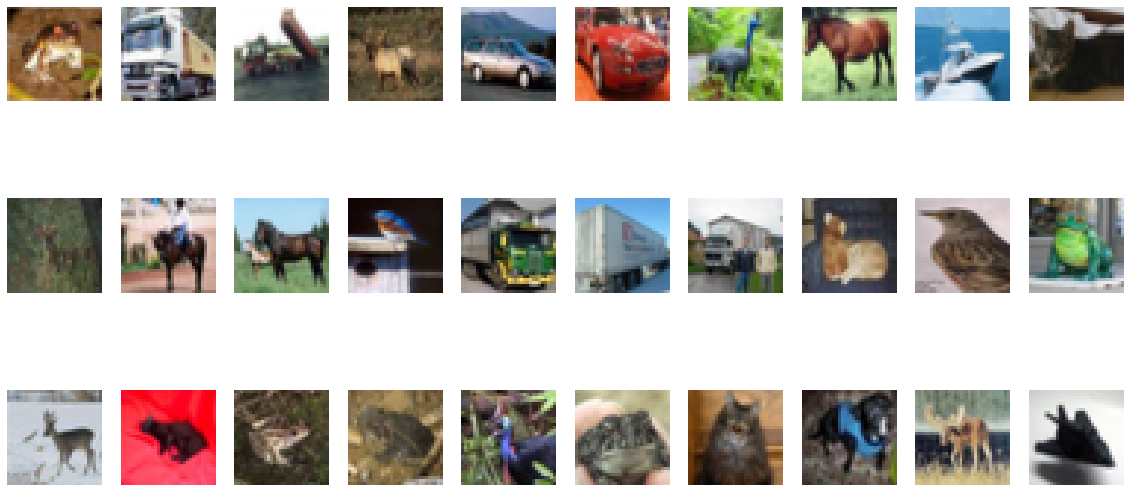

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig=plt.figure(figsize=(20,10))
for i in range (0,30):
  ax=fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(x_train[i])

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.10))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [0]:

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
 - 35s - loss: 1.6312 - acc: 0.4047 - val_loss: 1.2509 - val_acc: 0.5560

Epoch 00001: val_loss improved from inf to 1.25087, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 35s - loss: 1.3207 - acc: 0.5235 - val_loss: 1.0717 - val_acc: 0.6066

Epoch 00002: val_loss improved from 1.25087 to 1.07172, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 35s - loss: 1.1988 - acc: 0.5699 - val_loss: 1.0005 - val_acc: 0.6434

Epoch 00003: val_loss improved from 1.07172 to 1.00053, saving model to aug_model.weights.best.hdf5
Epoch 4/100
 - 35s - loss: 1.1175 - acc: 0.6016 - val_loss: 0.9702 - val_acc: 0.6610

Epoch 00004: val_loss improved from 1.00053 to 0.97023, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 35s - loss: 1.0628 - acc: 0.6217 - val_loss: 0.8766 - val_acc: 0.6974

Epoch 00005: val_loss improved from 0.97023 to 0.87657, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 35s - loss: 1.0158 - acc: 0.6383 - val_loss: 0.8315 - val_a


Epoch 00024: val_loss did not improve from 0.63247
Epoch 25/100
 - 35s - loss: 0.7815 - acc: 0.7252 - val_loss: 0.6587 - val_acc: 0.7694

Epoch 00025: val_loss did not improve from 0.63247
Epoch 26/100
 - 35s - loss: 0.7736 - acc: 0.7262 - val_loss: 0.6667 - val_acc: 0.7702

Epoch 00026: val_loss did not improve from 0.63247
Epoch 27/100
 - 36s - loss: 0.7692 - acc: 0.7298 - val_loss: 0.6340 - val_acc: 0.7798

Epoch 00027: val_loss did not improve from 0.63247
Epoch 28/100
 - 35s - loss: 0.7623 - acc: 0.7326 - val_loss: 0.6304 - val_acc: 0.7808

Epoch 00028: val_loss improved from 0.63247 to 0.63040, saving model to aug_model.weights.best.hdf5
Epoch 29/100
 - 35s - loss: 0.7556 - acc: 0.7333 - val_loss: 0.6313 - val_acc: 0.7784

Epoch 00029: val_loss did not improve from 0.63040
Epoch 30/100
 - 35s - loss: 0.7493 - acc: 0.7357 - val_loss: 0.6169 - val_acc: 0.7884

Epoch 00030: val_loss improved from 0.63040 to 0.61692, saving model to aug_model.weights.best.hdf5
Epoch 31/100
 - 35s - 

 - 34s - loss: 0.6966 - acc: 0.7552 - val_loss: 0.6252 - val_acc: 0.7900

Epoch 00050: val_loss did not improve from 0.58255
Epoch 51/100
 - 34s - loss: 0.7010 - acc: 0.7555 - val_loss: 0.6680 - val_acc: 0.7678

Epoch 00051: val_loss did not improve from 0.58255
Epoch 52/100
 - 34s - loss: 0.6975 - acc: 0.7570 - val_loss: 0.6214 - val_acc: 0.7884

Epoch 00052: val_loss did not improve from 0.58255
Epoch 53/100
 - 34s - loss: 0.6990 - acc: 0.7549 - val_loss: 0.5866 - val_acc: 0.7972

Epoch 00053: val_loss did not improve from 0.58255
Epoch 54/100
 - 35s - loss: 0.6914 - acc: 0.7570 - val_loss: 0.5770 - val_acc: 0.8084

Epoch 00054: val_loss improved from 0.58255 to 0.57696, saving model to aug_model.weights.best.hdf5
Epoch 55/100
 - 35s - loss: 0.6805 - acc: 0.7609 - val_loss: 0.6066 - val_acc: 0.7926

Epoch 00055: val_loss did not improve from 0.57696
Epoch 56/100
 - 35s - loss: 0.6913 - acc: 0.7582 - val_loss: 0.5810 - val_acc: 0.8050

Epoch 00056: val_loss did not improve from 0.5769


Epoch 00075: val_loss did not improve from 0.55423
Epoch 76/100
 - 35s - loss: 0.6598 - acc: 0.7675 - val_loss: 0.5845 - val_acc: 0.8040

Epoch 00076: val_loss did not improve from 0.55423
Epoch 77/100
 - 35s - loss: 0.6561 - acc: 0.7670 - val_loss: 0.5795 - val_acc: 0.8044

Epoch 00077: val_loss did not improve from 0.55423
Epoch 78/100
 - 35s - loss: 0.6625 - acc: 0.7680 - val_loss: 0.5940 - val_acc: 0.8010

Epoch 00078: val_loss did not improve from 0.55423
Epoch 79/100
 - 35s - loss: 0.6572 - acc: 0.7728 - val_loss: 0.5608 - val_acc: 0.8096

Epoch 00079: val_loss did not improve from 0.55423
Epoch 80/100
 - 35s - loss: 0.6584 - acc: 0.7670 - val_loss: 0.5875 - val_acc: 0.7936

Epoch 00080: val_loss did not improve from 0.55423
Epoch 81/100
 - 35s - loss: 0.6548 - acc: 0.7708 - val_loss: 0.5758 - val_acc: 0.8060

Epoch 00081: val_loss did not improve from 0.55423
Epoch 82/100
 - 35s - loss: 0.6565 - acc: 0.7700 - val_loss: 0.5736 - val_acc: 0.8038

Epoch 00082: val_loss did not imp

In [14]:
model.load_weights('aug_model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8007
